## Diamond Project

In [1]:
import pandas as pd
import numpy as np


In [2]:
diamond = pd.read_csv(('./inputs/train.csv'),index_col=0)
diamond_test = pd.read_csv(('./inputs/predict.csv'))


## PART 1 

> Open and take a look at how the dataFrame is structured and understand every colum and its Feature describtion

In [3]:
diamond.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
id,,,,,,,,,,
0,0.30,Very Good,F,VS2,62.8,56.0,4.29,4.31,2.70,605
1,0.34,Ideal,E,SI1,62.6,55.0,4.46,4.49,2.80,565
2,0.40,Very Good,D,SI1,60.3,62.0,4.70,4.75,2.85,720
3,0.40,Premium,H,VS1,61.8,59.2,4.72,4.74,2.92,793
4,0.90,Very Good,D,SI1,61.0,63.0,6.10,6.13,3.73,4381


In [4]:
diamond.shape

(40455, 10)

Features
- id: only for test & sample submission files, id for prediction sample identification
- price: price in USD
- carat: weight of the diamond
- cut: quality of the cut (Fair, Good, Very Good, Premium, Ideal)
- color: diamond colour, from J (worst) to D (best)
- clarity: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
- x: length in mm
- y: width in mm
- z: depth in mm
- depth: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
- table: width of top of diamond relative to widest point (43--95)

In [5]:
diamond.info()
# no nun values 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40455 entries, 0 to 40454
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    40455 non-null  float64
 1   cut      40455 non-null  object 
 2   color    40455 non-null  object 
 3   clarity  40455 non-null  object 
 4   depth    40455 non-null  float64
 5   table    40455 non-null  float64
 6   x        40455 non-null  float64
 7   y        40455 non-null  float64
 8   z        40455 non-null  float64
 9   price    40455 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 3.4+ MB


> Apply get_dummies to the dataFrame, It wil only transfrom the type object columns. In these case, cut , color and clarity

In [6]:

diamond = pd.get_dummies(diamond)
diamond.head()
diamond.columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price', 'cut_Fair',
       'cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_D',
       'color_E', 'color_F', 'color_G', 'color_H', 'color_I', 'color_J',
       'clarity_I1', 'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1',
       'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2'],
      dtype='object')

> Lets start looking at other columns in the data set, like (x,y,z which i will rename): 

 


In [7]:
diamond = diamond.rename(columns={'x': 'length in mm', 'y': 'width in mm','z': 'depth in mm'})
diamond[['length in mm','width in mm','depth in mm']].describe()

,length in mm,width in mm,depth in mm
count,40455.000000,40455.000000,40455.000000
mean,5.729391,5.733217,3.537644
std,1.121283,1.151076,0.709557
min,0.000000,0.000000,0.000000
25%,4.710000,4.720000,2.910000
50%,5.700000,5.710000,3.530000
75%,6.540000,6.540000,4.040000
max,10.230000,58.900000,31.800000


> By doing the describe we can notice that width, depth and length have 0.0 min values. These is odd, I will replace them for there mean values.

> Also de max value of width looks to high. I will investigate on the matter by using unique() and looking in to the data

In [8]:

diamond["width in mm"]= diamond["width in mm"].replace([0.0], 5.73)
diamond["length in mm"]=diamond["length in mm"].replace([0.0], 5.73)
diamond["depth in mm"]=diamond["depth in mm"].replace([0.0], 3.54)

In [9]:
# min values changed! 
diamond[['length in mm','width in mm','depth in mm']].describe()

,length in mm,width in mm,depth in mm
count,40455.000000,40455.000000,40455.000000
mean,5.730382,5.734067,3.539132
std,1.118747,1.148956,0.705840
min,3.730000,3.680000,1.070000
25%,4.710000,4.720000,2.910000
50%,5.700000,5.710000,3.530000
75%,6.540000,6.540000,4.040000
max,10.230000,58.900000,31.800000



> diamond["length in mm"].unique() -  after analyzing all the individual unique values I conclude that there is nothing out or the ordinary
> diamond["depth in mm"].unique() - after analyzing all the individual unique values I conclude that there is one value out of the ordinary
> diamond["width in mm"].unique() - after analyzing all the individual unique values I conclude that there are values out of the ordinary

In [10]:
display (diamond[diamond["width in mm"]>12])
diamond[diamond["depth in mm"]>10]
# these values must have been wrongly written. Im gonna replace them

,carat,depth,table,length in mm,width in mm,depth in mm,price,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
id,,,,,,,,,,,,,,,,,,,,,
12402,0.51,61.8,55.0,5.15,31.8,5.12,2075,0,0,1,...,0,0,0,0,0,0,1,0,0,0
27676,2.00,58.9,57.0,8.09,58.9,8.06,12210,0,0,0,...,0,0,0,0,0,1,0,0,0,0


,carat,depth,table,length in mm,width in mm,depth in mm,price,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
id,,,,,,,,,,,,,,,,,,,,,
38759,0.51,61.8,54.7,5.12,5.15,31.8,1970,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [11]:
diamond["width in mm"]=diamond["width in mm"].replace([31.8], 5.73)
diamond["width in mm"]=diamond["width in mm"].replace([58.9], 5.73)
diamond["depth in mm"]=diamond["depth in mm"].replace([31.8], 3.53)

In [12]:
diamond[['length in mm','width in mm','depth in mm']].describe()

,length in mm,width in mm,depth in mm
count,40455.000000,40455.000000,40455.000000
mean,5.730382,5.732109,3.538433
std,1.118747,1.110599,0.691713
min,3.730000,3.680000,1.070000
25%,4.710000,4.720000,2.910000
50%,5.700000,5.710000,3.530000
75%,6.540000,6.540000,4.040000
max,10.230000,10.160000,8.060000


In [13]:
diamond.head()

,carat,depth,table,length in mm,width in mm,depth in mm,price,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
id,,,,,,,,,,,,,,,,,,,,,
0,0.30,62.8,56.0,4.29,4.31,2.70,605,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.34,62.6,55.0,4.46,4.49,2.80,565,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.40,60.3,62.0,4.70,4.75,2.85,720,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0.40,61.8,59.2,4.72,4.74,2.92,793,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0.90,61.0,63.0,6.10,6.13,3.73,4381,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [14]:
diamond.describe()

,carat,depth,table,length in mm,width in mm,depth in mm,price,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
count,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,...,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000
mean,0.797150,61.746612,57.453561,5.730382,5.732109,3.538433,3928.715264,0.029317,0.090866,0.399827,...,0.101051,0.051984,0.013373,0.032777,0.242566,0.169176,0.152021,0.227833,0.068718,0.093536
std,0.472872,1.431006,2.235668,1.118747,1.110599,0.691713,3985.070609,0.168694,0.287423,0.489869,...,0.301399,0.221997,0.114867,0.178055,0.428640,0.374912,0.359045,0.419440,0.252978,0.291186
min,0.200000,43.000000,43.000000,3.730000,3.680000,1.070000,326.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000,946.500000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.700000,61.800000,57.000000,5.700000,5.710000,3.530000,2398.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.040000,62.500000,59.000000,6.540000,6.540000,4.040000,5328.500000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4.500000,79.000000,95.000000,10.230000,10.160000,8.060000,18818.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
diamond.to_csv("inputs/clean_train.csv", header=True,index=False)

## PART 2 

## DIVIDE THE COLUMNS TO CREATE X and y 

In [16]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
import math
from sklearn.metrics import mean_squared_error
from sklearn.experimental import enable_hist_gradient_boosting  
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.experimental import enable_hist_gradient_boosting  
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.datasets import load_diabetes
from sklearn.neighbors import KNeighborsRegressor
from sklearn  import tree
from sklearn.model_selection import GridSearchCV
import time
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
X = diamond.drop(columns="price")
y = diamond["price"]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

> Training different models

In [19]:
models = {
   #"DecisionTreeRegressor": DecisionTreeRegressor(),
    #"RandomForest" : RandomForestRegressor(),
    #"RandomForestN200" : RandomForestRegressor(n_estimators = 200),
    #"RandomForestN900" : RandomForestRegressor(n_estimators = 900, ),
    #"GradientBoosting" : GradientBoostingRegressor(n_estimators = 900),
    #"HistGradinetBoostingClass2": HistGradientBoostingRegressor(),
    "ExtraTreeRegressor": ExtraTreesRegressor(n_estimators = 900,n_jobs =-1, min_samples_split= 5, random_state=5, max_features = 0.9, warm_start=True ),
    #"neigbor":KNeighborsRegressor(),
    #"tree":tree.DecisionTreeClassifier()
}


In [20]:
for name, model in models.items():
    print(f"Training {name}")
    model.fit(X_train,y_train)
print("He acabado :) ")

Training ExtraTreeRegressor
He acabado :) 


In [21]:
comparar= {modelName:model.predict(X_test) for modelName, model in models.items()}
df = pd.DataFrame(comparar)
df

,ExtraTreeRegressor
0,1654.356574
1,1941.167685
2,7723.609537
3,3653.625278
4,3051.200278
...,...
8086,935.102315
8087,4243.148981
8088,1902.064167
8089,8404.345741


In [22]:
printMetric= lambda label,value:print(f"\t {label}: {round(value,4)}")
for name,m in models.items():
    y_pred = m.predict(X_test)
    print (f"Analyzing -- {name}")
    
    printMetric ("THE RMSE IS:", math.sqrt(mean_squared_error(y_test,y_pred)))


Analyzing -- ExtraTreeRegressor
	 THE RMSE IS:: 536.1262


## GRID SEARCH

In [23]:
param = {"criterion": ["mse", "mae"]}

best = GridSearchCV(estimator = ExtraTreesRegressor(), param_grid= param,verbose=1 )
best_criteria = best.fit (X_train, y_train)


Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


KeyboardInterrupt: 

In [ ]:
param = {"max_depth": ["2", "6","10"]}

best = GridSearchCV(estimator = ExtraTreesRegressor(), param_grid= param,verbose=1 )
best_criteria = best.fit (X_train, y_train)

In [ ]:
param = {"min_samples_splitint": ["2", "5","10","20"]}

best = GridSearchCV(estimator = ExtraTreesRegressor(), param_grid= param,verbose=1 )
best_criteria = best.fit (X_train, y_train)

In [ ]:
param = {"min_samples_splitint": ["2", "5","10","20"]}

best = GridSearchCV(estimator = ExtraTreesRegressor(), param_grid= param,verbose=1 )
best_criteria = best.fit (X_train, y_train)


In [ ]:
# prbar max features con auto y mirar random state also warm start put it to false

In [ ]:

param = {"min_impurity_decrease": ["0.3", "0.7","0.0", "1.5"]}

best = GridSearchCV(estimator = ExtraTreesRegressor(), param_grid= param,verbose=1 )
best_criteria = best.fit (X_train, y_train)

In [ ]:
param = {"n_estimators": ["100", "400","700", "900"]}

best = GridSearchCV(estimator = ExtraTreesRegressor(), param_grid= param,verbose=1 )
best_criteria = best.fit (X_train, y_train)

## Part 3 

## APPLY ALL THE CLEANING (part 1 ) TO PREDICT.CSV  DATASET

In [164]:
diamond_test.head()


,id,carat,cut,color,clarity,depth,table,x,y,z
0,0,2.36,Ideal,I,SI2,60.8,54.0,8.68,8.57,5.24
1,1,2.04,Ideal,H,SI2,62.0,56.0,8.18,8.23,5.09
2,2,0.51,Ideal,I,SI1,61.7,54.0,5.18,5.19,3.20
3,3,0.30,Ideal,I,SI1,61.3,56.0,4.32,4.33,2.65
4,4,0.96,Fair,H,VS2,68.8,56.0,6.11,5.98,4.16


In [165]:
diamond_test = pd.get_dummies(diamond_test)
diamond_test.head()
diamond_test.columns

Index(['id', 'carat', 'depth', 'table', 'x', 'y', 'z', 'cut_Fair', 'cut_Good',
       'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_D', 'color_E',
       'color_F', 'color_G', 'color_H', 'color_I', 'color_J', 'clarity_I1',
       'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1',
       'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2'],
      dtype='object')

In [166]:
diamond_test = diamond_test.rename(columns={'x': 'length in mm', 'y': 'width in mm','z': 'depth in mm'})
diamond_test[['length in mm','width in mm','depth in mm']].describe()

,length in mm,width in mm,depth in mm
count,13485.000000,13485.000000,13485.000000
mean,5.736456,5.738452,3.542003
std,1.123217,1.114912,0.694010
min,0.000000,0.000000,0.000000
25%,4.720000,4.730000,2.920000
50%,5.700000,5.710000,3.530000
75%,6.530000,6.530000,4.030000
max,10.740000,10.540000,6.980000


In [167]:
diamond_test["width in mm"]= diamond_test["width in mm"].replace([0.0], 5.73)
diamond_test["length in mm"]=diamond_test["length in mm"].replace([0.0], 5.73)
diamond_test["depth in mm"]=diamond_test["depth in mm"].replace([0.0], 3.54)

In [168]:
diamond_test["width in mm"]=diamond_test["width in mm"].replace([31.8], 5.73)
diamond_test["width in mm"]=diamond_test["width in mm"].replace([58.9], 5.73)
diamond_test["depth in mm"]=diamond_test["depth in mm"].replace([31.8], 3.53)

In [169]:
diamond_test.describe()


,id,carat,depth,table,length in mm,width in mm,depth in mm,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
count,13485.000000,13485.000000,13485.000000,13485.000000,13485.000000,13485.000000,13485.000000,13485.000000,13485.000000,13485.000000,...,13485.000000,13485.00000,13485.000000,13485.000000,13485.000000,13485.000000,13485.000000,13485.000000,13485.000000,13485.000000
mean,6742.000000,0.800309,61.757783,57.468053,5.736881,5.738877,3.542791,0.031442,0.091212,0.398665,...,0.098925,0.05228,0.014831,0.034409,0.241157,0.174268,0.149870,0.225510,0.064887,0.095069
std,3892.928525,0.477423,1.437478,2.231002,1.122130,1.113816,0.691996,0.174516,0.287922,0.489642,...,0.298572,0.22260,0.120882,0.182283,0.427801,0.379354,0.356957,0.417933,0.246335,0.293321
min,0.000000,0.200000,44.000000,51.000000,3.730000,3.710000,1.410000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3371.000000,0.400000,61.000000,56.000000,4.720000,4.730000,2.920000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6742.000000,0.700000,61.800000,57.000000,5.700000,5.710000,3.530000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,10113.000000,1.040000,62.500000,59.000000,6.530000,6.530000,4.030000,0.000000,0.000000,1.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,13484.000000,5.010000,73.600000,79.000000,10.740000,10.540000,6.980000,1.000000,1.000000,1.000000,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [170]:
diamond_test.shape

(13485, 27)

## PART 4 

   ## First model - RandomForestRegressor

In [39]:
model = RandomForestRegressor( n_estimators = 900)
model.fit(X, y)

RandomForestRegressor(n_estimators=900)

In [40]:
y_pred = model.predict(diamond_test)

In [41]:
y_pred = pd.DataFrame(y_pred).reset_index()
y_pred = y_pred.rename(columns={"index": "id",0:"price"})


In [42]:
y_pred.head()


,id,price
0,0,14527.550000
1,1,15910.067778
2,2,1003.558889
3,3,452.197778
4,4,3582.232222


In [43]:
y_pred.shape

(13485, 2)

> Create a New Model to draw scatter plot with the train models

In [45]:
model_graph = RandomForestRegressor( n_estimators = 900)
model_graph.fit(X_train,y_train)
y_pred_graph = model.predict(X_test)

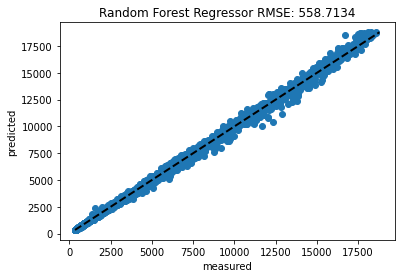

In [172]:
plt.scatter(y_pred_graph,y_test)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('measured')
plt.ylabel('predicted')
plt.title("Random Forest Regressor RMSE: 558.7134" )
plt.show()

#merged_df = pd.concat([df1, df2['feat3','feat4'],axis=1)

In [47]:
y_pred.to_csv("./outputs/RandomForestRegressor1.csv", header= True, index=False)

## Second model - HistGradientBoosting

In [72]:
model = HistGradientBoostingRegressor()
model.fit(X, y)



HistGradientBoostingRegressor()

In [73]:
y_pred = model.predict(diamond_test)

In [74]:
y_pred = pd.DataFrame(y_pred, columns=["price"])
y_pred = y_pred.reset_index()
y_pred = y_pred.rename(columns={'index':'id'})

In [75]:
y_pred.head()

,id,price
0,0,16010.025359
1,1,15628.188934
2,2,1248.997594
3,3,485.219207
4,4,3144.581876


In [76]:
model_graph = HistGradientBoostingRegressor()
model_graph.fit(X_train,y_train)
y_pred_graph = model.predict(X_test)

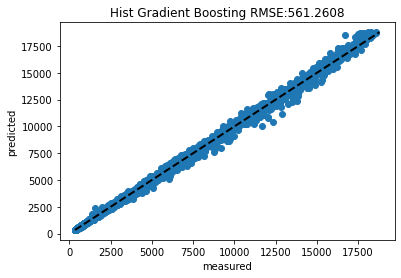

In [107]:
plt.scatter(y_pred_graph,y_test)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('measured')
plt.ylabel('predicted')
plt.title("Hist Gradient Boosting RMSE:561.2608" )
plt.show()

In [54]:
y_pred.to_csv("./outputs/HistGradeint.csv", header= True, index=False)

## Third Model -- Gradient Boosting Regressor
   

In [78]:
model = GradientBoostingRegressor(n_estimators = 900)
model.fit(X, y)

GradientBoostingRegressor(n_estimators=900)

In [79]:
y_pred = model.predict(diamond_test)

In [80]:
y_pred = pd.DataFrame(y_pred, columns=["price"])
y_pred = y_pred.reset_index()
y_pred = y_pred.rename(columns={'index':'id'})

In [81]:
y_pred.head()

,id,price
0,0,13852.278461
1,1,14014.204147
2,2,1066.889837
3,3,458.758161
4,4,3939.723978


In [82]:
model_graph = GradientBoostingRegressor(n_estimators = 900)
model_graph.fit(X_train,y_train)
y_pred_graph = model.predict(X_test)

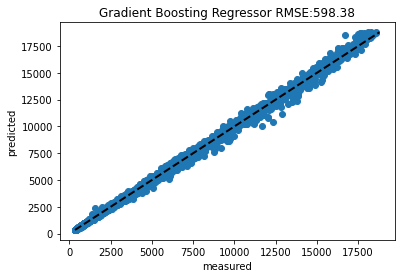

In [105]:
plt.scatter(y_pred_graph,y_test)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('measured')
plt.ylabel('predicted')
plt.title("Gradient Boosting Regressor RMSE:598.38" )
plt.show()

In [61]:
y_pred.to_csv("./outputs/GradientBoosting.csv", header= True, index=False)

## Fourth Model -- Extra Trees Regressor

In [84]:
model = ExtraTreesRegressor(n_estimators = 900,n_jobs =1, min_samples_split= 5, random_state=5, max_features = 0.9, warm_start=True)
model.fit(X, y)

ExtraTreesRegressor(max_features=0.9, min_samples_split=5, n_estimators=900,
                    n_jobs=1, random_state=5, warm_start=True)

In [85]:
y_pred = model.predict(diamond_test)

In [86]:
y_pred = pd.DataFrame(y_pred, columns=["price"])
y_pred = y_pred.reset_index()
y_pred = y_pred.rename(columns={'index':'id'})

In [87]:
y_pred.head()

,id,price
0,0,13839.426019
1,1,15445.908426
2,2,1007.035093
3,3,447.799722
4,4,3869.624259


In [88]:
model_graph = ExtraTreesRegressor(n_estimators = 900,n_jobs =1, min_samples_split= 5, random_state=5, max_features = 0.9, warm_start=True)
model_graph.fit(X_train,y_train)
y_pred_graph = model.predict(X_test)

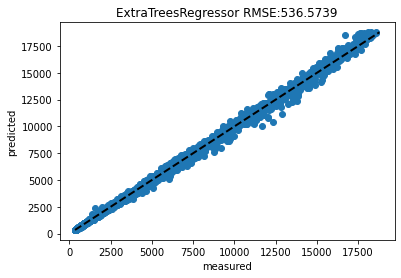

In [103]:
plt.scatter(y_pred_graph,y_test)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2,)
plt.xlabel('measured')
plt.ylabel('predicted')
plt.title("ExtraTreesRegressor RMSE:536.5739" )
plt.show()

In [69]:
y_pred.to_csv("./outputs/ExtraTreesRegressor2.csv", header= True, index=False)